In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat May 10 04:21:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#Sau khi mount với drive. Chuyển đến thư mục chứa file darknet.zip vừa tải lên
import os
os.chdir("drive/MyDrive")
print(os.getcwd())

/content/drive/MyDrive


In [4]:
#Giải nén file darknet.zip
!unzip -q darknet.zip

In [5]:
os.chdir("darknet")

In [6]:
#Tạo thư mục backup để lưu lại weights khi huấn luyện
#Tên thư mục phải trùng với link folder backup trong file obj.data trên
os.makedirs("backup", exist_ok=True)

In [7]:
#Tạo file train.txt, valid.txt theo đoạn code
import os
import numpy as np
#"obj" là tên thư mục chứa cả ảnh và file annotation.
lst_files = os.listdir("data/obj/")
lst_images = []

for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)

#Tách 200 ảnh ra làm tập validation
random_idx = np.random.randint(0, len(lst_images), 200)

#Tạo file train.txt được đặt trong thư mục darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/obj/"+lst_images[idx]+"\n")

#Tạo file valid.txt được đặt trong thư mục darknet/data
with open("data/valid.txt","w") as f:
    for idx in random_idx:
      f.write("data/obj/"+lst_images[idx]+"\n")

In [8]:
!make

mkdir -p ./obj/
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused va

In [9]:
#Phân quyền thực thi module darknet
!chmod +x ./darknet

In [10]:
print(os.getcwd())

/content/drive/MyDrive/darknet


In [12]:
# Bắt đầu huấn luyện
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map -dont_show > yolotinv4_lisenceplate.log

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.903021), count: 3, class_loss = 0.001709, iou_loss = 0.610991, total_loss = 0.612701 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.883887), count: 4, class_loss = 0.002894, iou_loss = 1.347278, total_loss = 1.350172 
 total_bbox = 331779, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.821016), count: 3, class_loss = 0.000004, iou_loss = 0.592026, total_loss = 0.592030 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.868220), count: 4, class_loss = 0.051763, iou_loss = 1.166684, total_loss = 1.218447 
 total_bbox = 331786, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.809315), count: 3, class_loss = 0.029612, iou_loss = 0.509938, total_loss = 0.539550 
v

In [14]:
!ls backup/

yolo-tinyv4-obj_1000.weights  yolo-tinyv4-obj_best.weights
yolo-tinyv4-obj_2000.weights  yolo-tinyv4-obj_last.weights
yolo-tinyv4-obj_3000.weights


In [16]:
# Dự đoán
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj.cfg \
 backup/yolo-tinyv4-obj_best.weights test_licenseplate.jpg

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     18       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  18 0.042 BF
   1 conv     18       3 x 3/ 2    208 x 208 x  18 ->  104 x 104 x  18 0.063 BF
   2 conv     18       3 x 3/ 1    104 x 104 x  18 ->  104 x 104 x  18 0.063 BF
   3 route  2 		                       1/2 ->  104 x 104 x   9 
   4 conv     18       3 x 3/ 1    104 x 104 x   9 ->  104 x 104 x  18 0.032 BF
   5 conv     18       3 x 3/ 1    104 x 104 x  18 ->  104 x 104 x  18 0.063 BF
   6 route  5 4 	                           ->  104 x 104 x  36 
   7 conv     18       1 x 1/ 1    104 x 104 x  36 ->  104 x 104 x  18 0.014 BF
   8 route  2 7 	   

In [17]:
import cv2
import matplotlib.pyplot as plt

def show(path):
    image = cv2.imread(path)
    original_width, original_height = image.shape[1], image.shape[0]
    resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)

    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.imshow(resized_image)
    plt.show()


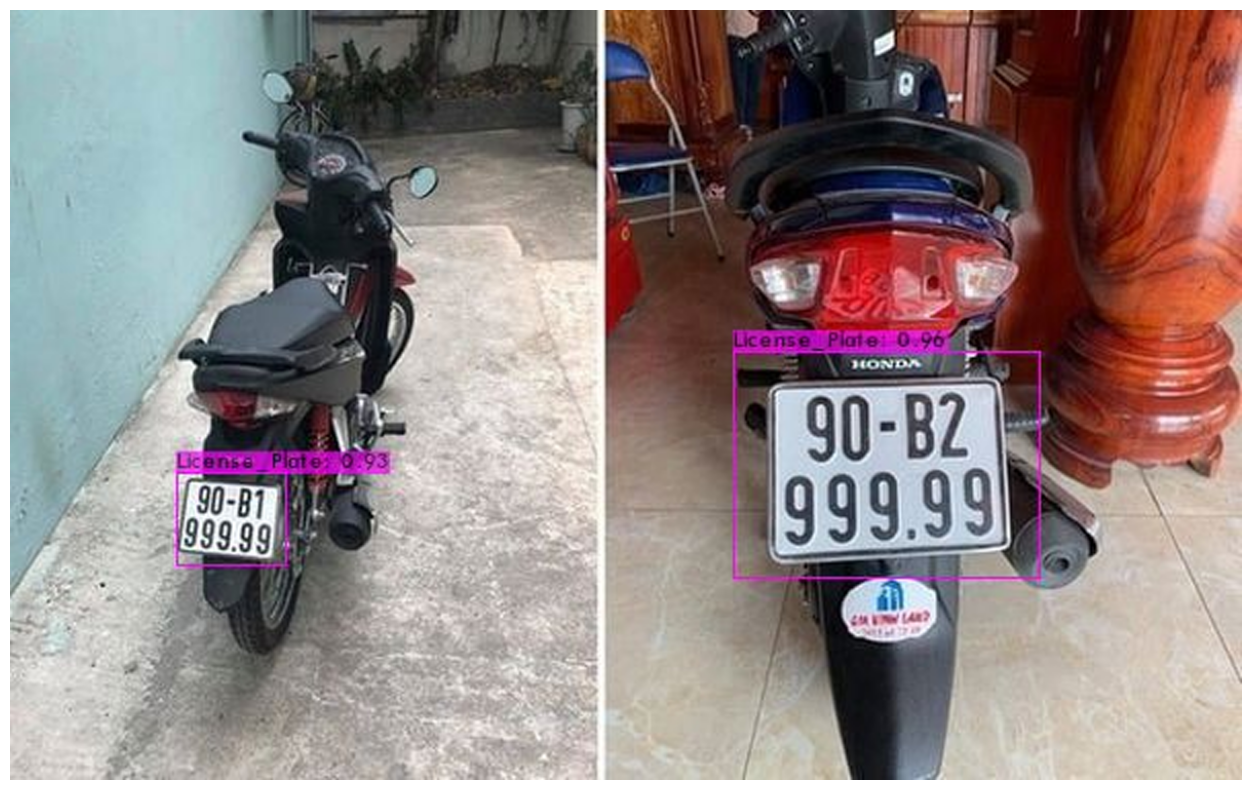

In [18]:
show('predictions.jpg')